# Using Resnet50 model for imagenet with Spatial Transformation Attack - ERROR

Includes:

In [1]:
from keras.applications import ResNet50, VGG16
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications import imagenet_utils

from art.attacks import SpatialTransformation
from art.classifiers import KerasClassifier

from PIL import Image

import matplotlib.pyplot as plt

import wget

import numpy as np

Using TensorFlow backend.


Functions definitions:

In [2]:
def show_image(image_data):
    
    plt.figure()
    fig=plt.imshow(image_data[0])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [3]:
def load_model():
    global model
    model = ResNet50(weights="imagenet")

In [4]:
def prepare_image(image, target):
    if image.mode is not "RGB":
        image = image.convert("RGB")

    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)

    return image

Download the image:

In [5]:
image_path = wget.download('https://www.wprost.pl/_thumb/cd/01/1ffb3ce0a7b993111c2709863a2a.jpeg')

100% [..............................................................................] 70167 / 70167

Prepare image:

In [6]:
image = Image.open(image_path)
image= prepare_image(image, target=(224, 224) )

In [7]:
image.shape


(1, 224, 224, 3)

Normalize image into the range of (0,1)

<class 'numpy.ndarray'> (1, 224, 224, 3) 0.0 1.0


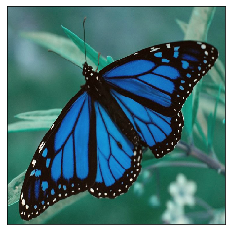

In [8]:
image_norm = (image - image.min())/(image.max()-image.min())
print(type (image_norm), image_norm.shape, image_norm.min(), image_norm.max())
show_image(image_norm)

#### Loading Resnet50 model

In [9]:
load_model()

Instructions for updating:
Colocations handled automatically by placer.


Image prediction with Resnet50

1. nematode: 8.59%
2. cleaver: 2.91%
3. matchstick: 2.55%
4. ballpoint: 2.40%
5. oboe: 2.26%


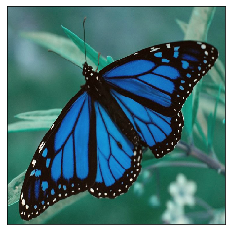

In [10]:
preds= model.predict(image_norm)
P = imagenet_utils.decode_predictions(preds)

for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))


show_image(image_norm)

# ART

In [11]:
classifier = KerasClassifier((0, 1), model=model, preprocessing=(0.5, 1))

Instructions for updating:
Use tf.cast instead.


In [12]:
ST_attacker = SpatialTransformation(classifier, max_translation=10,num_translations=5,max_rotation=30,num_rotations=3)  
adv_image_ST = ST_attacker.generate(image_norm)

In [13]:
type(adv_image_ST)

NoneType

# The same for VGG16 

In [14]:
image = Image.open(image_path)
image= prepare_image(image, target=(224, 224) )

In [15]:
model_VGG16 = VGG16(weights = 'imagenet')

1. monarch: 99.83%
2. sulphur_butterfly: 0.13%
3. ringlet: 0.02%
4. lycaenid: 0.01%
5. lacewing: 0.01%


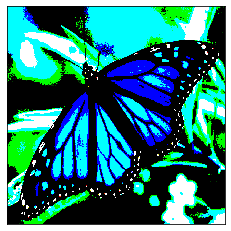

In [16]:
preds= model_VGG16.predict(image)
P = imagenet_utils.decode_predictions(preds)

for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))


show_image(image)

Test for not - normalized image

# ART dla VGG16

In [17]:
classifier_VGG16 = KerasClassifier((0, 1), model=model_VGG16, preprocessing=(0.5, 1))

In [18]:
ST_attacker_VGG16 = SpatialTransformation(classifier_VGG16, max_translation=10,num_translations=5,max_rotation=30,num_rotations=3)  
adversarial_image_ST_VGG16 = ST_attacker_VGG16.generate(image)

In [19]:
type(adversarial_image_ST_VGG16)

NoneType